In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn.datasets import load_diabetes
data = load_diabetes()

In [3]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [4]:
X = data.data
y = data.target

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 45)

In [6]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [7]:
lr.fit(X_train, y_train)

LinearRegression()

In [8]:
y_pre = lr.predict(X_test)

In [9]:
from sklearn.metrics import r2_score,mean_squared_error

print("R2 score", r2_score(y_test,y_pre))
print("RMSE", np.sqrt(mean_squared_error(y_test,y_pre)))

R2 score 0.5326715876099554
RMSE 49.926292098799514


In [10]:
from sklearn.linear_model import Ridge
Rg = Ridge(alpha = 0.0001)

In [11]:
Rg.fit(X_train,y_train)

Ridge(alpha=0.0001)

In [12]:
y_pre1 = Rg.predict(X_test)

In [13]:
print("R2 score", r2_score(y_test,y_pre1))
print("RMSE", np.sqrt(mean_squared_error(y_test,y_pre1)))

R2 score 0.53282653827904
RMSE 49.91801445771598


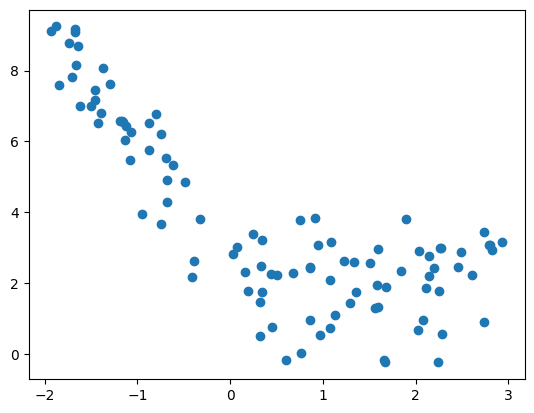

In [14]:
m = 100
x1 = 5*np.random.rand(m,1) - 2
x2 = 0.7 * x1**2 - 2*x1 + 3 + np.random.randn(m,1)

plt.scatter(x1,x2)
plt.show()

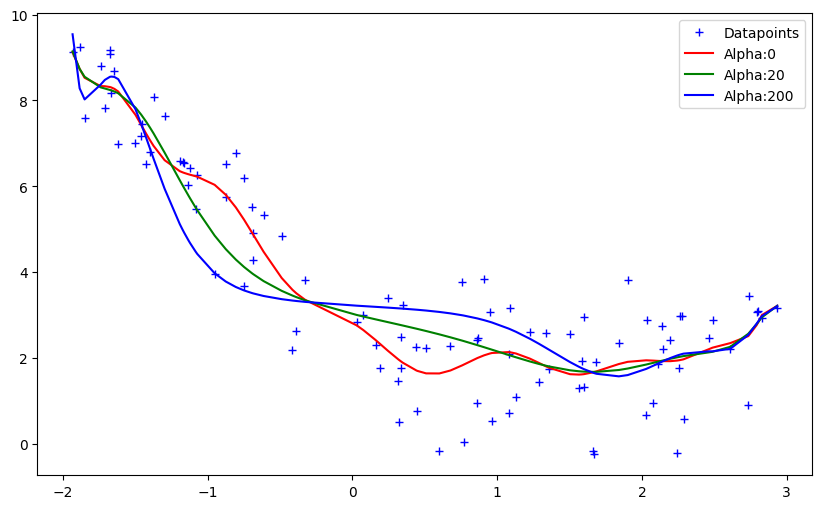

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1,x2,alpha):
  model = Pipeline([
      ('Poly_feats', PolynomialFeatures(degree = 16)),
      ('ridge', Ridge(alpha = alpha))
  ])
  model.fit(x1,x2)
  return model.predict(x1)

alphas = [0,20,200]
cs = ['r','g','b']

plt.figure(figsize=(10,6))
plt.plot(x1,x2,'b+',label = 'Datapoints')

for alpha, c in zip(alphas, cs):
  preds = get_preds_ridge(x1,x2,alpha)
  plt.plot(sorted(x1[:,0]),preds[np.argsort(x1[:,0])], c, label = 'Alpha:{}'.format(alpha))
plt.legend()
plt.show()

In [16]:
from sklearn.datasets import make_regression

In [17]:
X, y = make_regression(n_samples = 100, n_features = 1, n_informative=1, n_targets = 1, noise = 20, random_state = 13)

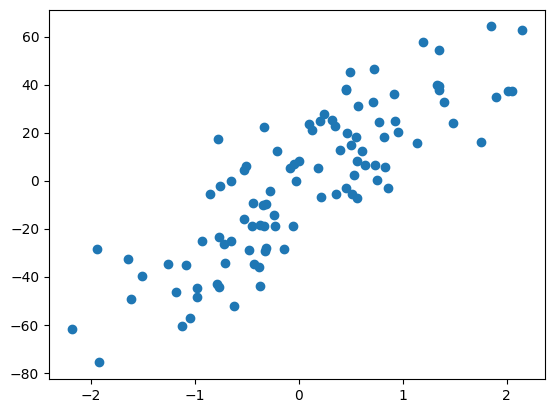

In [18]:
plt.scatter(X,y)

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [21]:
lr.coef_

array([27.82809103])

In [22]:
lr.intercept_

-2.29474455867698

In [23]:
rr = Ridge(alpha = 10)
rr.fit(X,y)

Ridge(alpha=10)

In [24]:
rr.coef_

array([24.9546267])

In [25]:
rr.intercept_

-2.1269130035235735

In [26]:
rr1 = Ridge(alpha = 100)
rr1.fit(X,y)

Ridge(alpha=100)

In [27]:
rr1.coef_

array([12.93442104])

In [28]:
rr1.intercept_

-1.4248441496033308

so with *increase* in alpha slope *decreases*

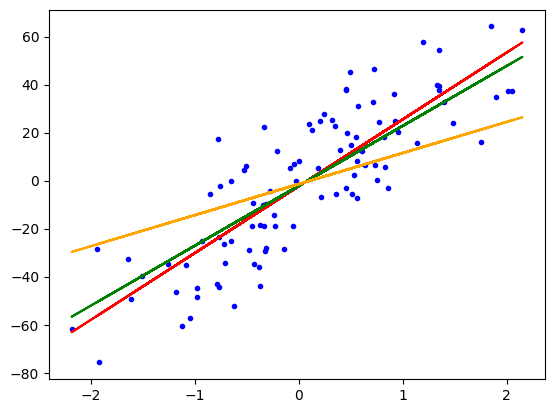

In [29]:
plt.plot(X,y,'b.')
plt.plot(X,lr.predict(X),color = 'red',label = 'alpha = 0')
plt.plot(X,rr.predict(X),color = 'green',label = 'alpha = 10')
plt.plot(X,rr1.predict(X),color = 'orange',label = 'alpha = 100')

#Backend code of Ridge Regression

In [30]:
class Ridgeregress:
  def __init__(self,alpha=0.1):
    self.alpha = alpha
    self.m = None
    self.b = None
  def fit(self, X_train,y_train):
    n = 0
    d = 0
    for i in range(X_train.shape[0]):
      n += (y_train[i]-y_train.mean())*(X_train[i]-X_train.mean())
      d += (X_train[i]-X_train.mean())**2
    d = d + self.alpha
    self.m = n/d
    self.b = y_train.mean() - self.m*X_train.mean()
    print(self.m, self.b)
  def predict(X_test):
    pass

In [31]:
regg = Ridgeregress(alpha=100)
regg.fit(X, y)

[12.93442104] [-1.42484415]


#Same with Vectorization

In [32]:
class Ridgeregress:
    def __init__(self, alpha=0.1):
        self.alpha = alpha
        self.m = None
        self.b = None

    def fit(self, X_train, y_train):
        X_mean = np.mean(X_train)
        y_mean = np.mean(y_train)

        numerator = np.dot(X_train - X_mean, y_train - y_mean)
        denominator = np.dot(X_train - X_mean, X_train - X_mean) + self.alpha

        self.m = numerator / denominator
        self.b = y_mean - self.m * X_mean
        print(self.m, self.b)

    def predict(self, X_test):
        return self.m * X_test + self.b

In [33]:
X, y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20, random_state=13)
X = X.flatten()  # Flatten X to make it 1D
regg = Ridgeregress(alpha=100)
regg.fit(X, y)


12.934421036438424 -1.4248441496033308


# For multiple variables with OLS

In [34]:
reg2 = Ridge(alpha = 0.1, solver = 'cholesky')   # using OLS with cholesky solver

In [35]:
X, y = load_diabetes(return_X_y = True)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 4)

In [37]:
reg2.fit(X_train, y_train)

Ridge(alpha=0.1, solver='cholesky')

In [38]:
y_pr = reg2.predict(X_test)
r2_score(y_test, y_pr)

0.4693128853309805

In [39]:
reg2.coef_

array([  44.02063391, -241.69329987,  452.98665299,  332.04420177,
        -76.33686744,  -68.52143809, -164.98809083,  149.96908118,
        431.61347417,   58.51862681])

In [40]:
reg2.intercept_

150.89053425602808

#Backend code of Ridge Regression class

In [41]:
class Ridge_multi_feats:
  def __init__(self,alpha=0.1):
    self.alpha = alpha
    self.coef_ = None
    self.intercept_ = None
  def fit(self,X_train,y_train):
    X_train = np.insert(X_train, 0, 1, axis = 1)
    I = np.identity(X_train.shape[1])
    I[0][0] = 0
    res = np.linalg.inv(np.dot(X_train.T,X_train)+self.alpha*I).dot(X_train.T).dot(y_train)
    self.intercept_ = res[0]
    self.coef_ = res[1:]
  def predict(self,X_test):
    return np.dot(X_test,self.coef_) + self.intercept_


In [42]:
reg = Ridge_multi_feats()
reg.fit(X_train,y_train)
y = reg.predict(X_test)
r2_score(y_test , y)

0.4693128853309805

In [43]:
reg.intercept_
reg.coef_

array([  44.02063391, -241.69329987,  452.98665299,  332.04420177,
        -76.33686744,  -68.52143809, -164.98809083,  149.96908118,
        431.61347417,   58.51862681])

#Ridge Regression with Gradient Descent

In [44]:
X, y = load_diabetes(return_X_y = True)

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state= 23)

In [46]:
X_train.shape

(353, 10)

In [47]:
from sklearn.linear_model import SGDRegressor

In [48]:
reg = SGDRegressor(penalty = 'l2',max_iter = 500, eta0=0.1,learning_rate='constant',alpha = 0.001)

In [49]:
reg.fit(X_train,y_train)

SGDRegressor(alpha=0.001, eta0=0.1, learning_rate='constant', max_iter=500)

In [50]:
y_pred = reg.predict(X_test)
print('R2 Score',r2_score(y_test,y_pred))
print(reg.coef_)
print(reg.intercept_)

R2 Score 0.4389475630003632
[  16.76652715 -154.99943882  370.66914236  232.59639974   -9.8629104
  -56.26758949 -182.53843438  139.55766854  342.42831834  136.63135029]
[165.69018568]


In [51]:
from sklearn.linear_model import Ridge

In [52]:
reg = Ridge(alpha  = 0.001,max_iter = 500, solver = 'sparse_cg')


In [53]:
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print('R2 Score',r2_score(y_test,y_pred))
print(reg.coef_)
print(reg.intercept_)

R2 Score 0.4604257685513209
[ -18.88543863 -271.45569724  518.67955139  325.20996625 -872.05789165
  519.25046502  162.35528544  248.01367041  781.79226558   77.93855783]
151.53138465105545


In [54]:
class ridgeregreeback:
  def __init__(self, epochs, l_rate, alpha):
    self.l_rate = l_rate
    self.alpha = alpha
    self.epochs = epochs
    self.coef_ = None
    self.intercept_ = None

  def fit(self, X_train, y_train):
    self.coef_ = np.ones(X_train.shape[1])
    self.intercept_ = 0
    theta = np.insert(self.coef_, 0 ,self.intercept_)
    print(theta.shape)
    X_train = np.insert(X_train, 0,1, axis = 1)
    for i in range(self.epochs):
      theta_der = np.dot(X_train.T , X_train).dot(theta) - np.dot(X_train.T ,y_train) + self.alpha * theta
      #theta_der = X_train.T @ X_train @ (theta) - X_train.T @ y_train + self.alpha * theta
      theta = theta - self.l_rate*theta_der
    self.coef_ = theta[1:]
    self.intercept_ = theta[0]

  def predict(self,X_test):
    return np.dot(X_test,self.coef_) + self.intercept_

In [55]:
reg = ridgeregreeback(epochs = 500, alpha = 0.001, l_rate = 0.005)

In [56]:
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print('r2 score',r2_score(y_test, y_pred))
print(reg.coef_)
print(reg.intercept_)

(11,)
r2 score 0.463448125952142
[   6.42979372 -214.78954871  456.75937845  276.811       -33.76476876
  -91.99965544 -209.03398923  151.10442073  409.0061313   144.6201346 ]
151.48917753439494


##How coefficients affect?


In [59]:
from sklearn.linear_model import Ridge

In [61]:
coefs = []
r2_scores = []
for i in [0,10,100,1000]:
  reg  = Ridge(alpha = i)
  reg.fit(X_train,y_train)

  coefs.append(reg.coef_.tolist())
  y_preds = reg.predict(X_test)
  r2_scores.append(r2_score(y_test,y_pred))

Text(0.5, 1.0, 'Alpha = 1000, r2_score = 0.46')

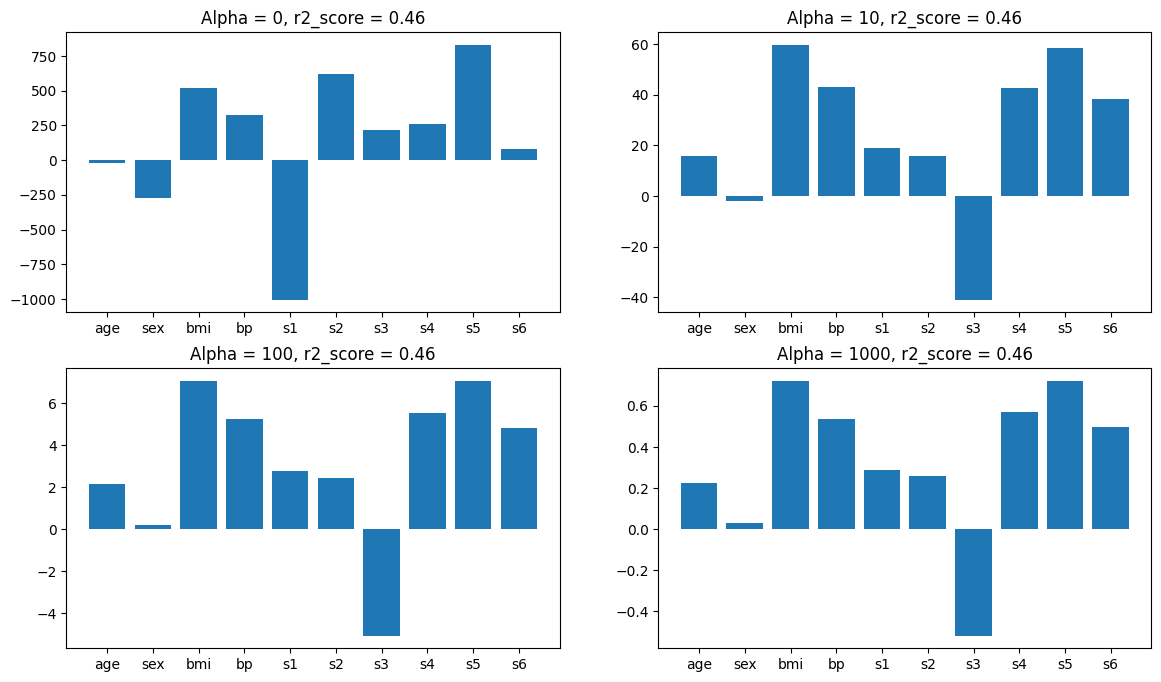

In [63]:
plt.figure(figsize = (14,8))
plt.subplot(221)
plt.bar(data.feature_names,coefs[0])
plt.title('Alpha = 0, r2_score = {}'.format(round(r2_scores[0],2)))

plt.subplot(222)
plt.bar(data.feature_names,coefs[1])
plt.title('Alpha = 10, r2_score = {}'.format(round(r2_scores[1],2)))

plt.subplot(223)
plt.bar(data.feature_names,coefs[2])
plt.title('Alpha = 100, r2_score = {}'.format(round(r2_scores[2],2)))

plt.subplot(224)
plt.bar(data.feature_names,coefs[3])
plt.title('Alpha = 1000, r2_score = {}'.format(round(r2_scores[3],2)))


## Higher coefficients are affected more !!

In [74]:
alphas = [0,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
coefs = []
for i in alphas:
  reg = Ridge(alpha = i)
  reg.fit(X_train,y_train)

  coefs.append(reg.coef_.tolist())

In [65]:
in_arr = np.array(coefs)

So we can observe here that the variables like bmi which has a higher coeffs for example as we increase alpha there is a sharp decrease in the coef_ in comparision to age variable

In [66]:
coef_df = pd.DataFrame(in_arr, columns=data.feature_names)
coef_df['alpha'] = alphas
coef_df.set_index('alpha')

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
alpha,,,,,,,,,,
0.0000,-19.845700,-271.447995,518.605683,326.139220,-1003.870230,624.042040,220.733942,263.937395,829.856798,77.750200
0.0001,-19.738254,-271.455261,518.622457,326.038694,-988.865600,612.106156,214.087776,262.126027,824.393091,77.766872
0.0010,-18.885431,-271.455691,518.679562,325.209976,-872.057880,519.250477,162.355276,248.013685,781.792278,77.938568
0.0100,-14.783192,-268.981139,515.678469,319.899933,-408.468199,153.431765,-42.616328,191.588729,609.759679,80.425249
0.1000,-2.690956,-233.444132,470.529850,289.807020,-77.440926,-73.768975,-180.205449,149.624225,447.792115,102.113909
1.0000,27.916672,-82.396516,266.683974,172.253723,16.606128,-10.978642,-146.037657,125.168820,245.123207,119.637182
10.0000,15.763564,-2.119263,59.691144,43.103326,19.163151,15.657615,-40.848505,42.846656,58.376563,38.394661
100.0000,2.161786,0.231877,7.067578,5.255511,2.784991,2.456573,-5.052827,5.539158,7.053168,4.839333
1000.0000,0.223969,0.029328,0.720737,0.537766,0.290235,0.257765,-0.517777,0.570424,0.720998,0.496892


So all the coefs_ tends to zero but never equals to zero as the alpha increases and the variables which has higher coefs affected more

In [75]:
alphas = [0,0.0001,0.0005,0.001,0.005,0.1,0.5,1,5,10]
coefs = []
for i in alphas:
  reg = Ridge(alpha = i)
  reg.fit(X_train,y_train)

  coefs.append(reg.coef_.tolist())

In [76]:
in_arr1 = np.array(coefs).T

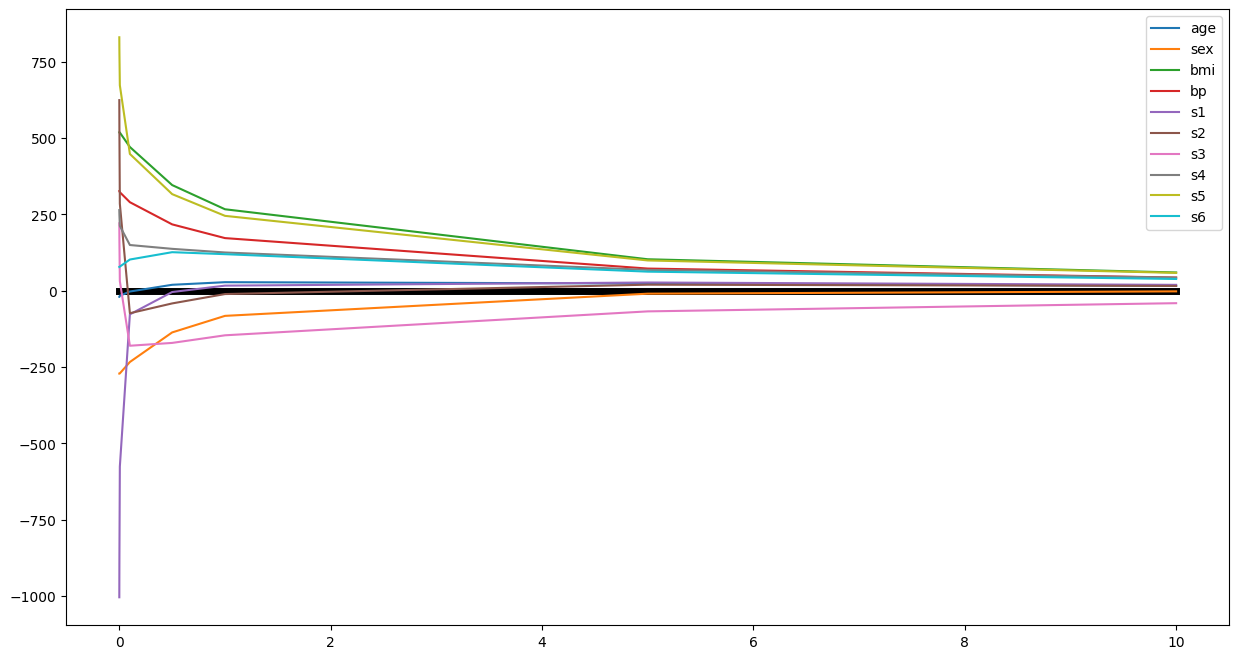

In [77]:
plt.figure(figsize = (15,8))
plt.plot(alphas,np.zeros(len(alphas)),color = 'k',linewidth = 5)
for i in range(in_arr.shape[0]):
  plt.plot(alphas,in_arr1[i],label = data.feature_names[i])
plt.legend()

## Bias Variance Trade off
if alpha decreases so bias also decreases and variance increases hence model overfits

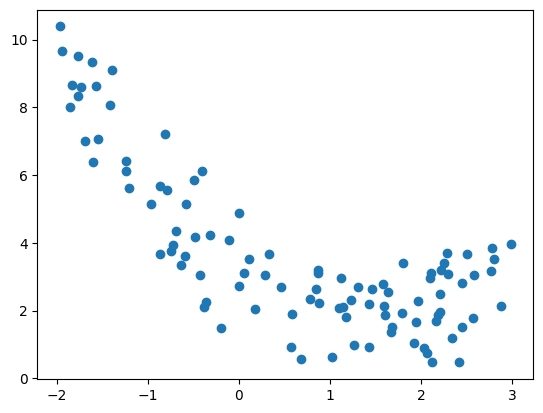

In [78]:
m = 100
X = 5*np.random.rand(m,1) - 2
y = 0.7* X **2 - 2*X+3 + np.random.randn(m,1)

plt.scatter(X,y)
plt.show()

In [79]:
X_train ,X_test, y_train,y_test = train_test_split(X.reshape(100,1),y.reshape(100),test_size = 0.2,random_state = 2)

In [81]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 15)

X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

In [84]:
from mlxtend.evaluate import bias_variance_decomp

alphas = np.linspace(0,30,100)

loss = []
bias =[]
variance = []
for i in alphas:
  reg = Ridge(alpha = i)
  avg_expected_loss,avg_bias,avg_variance = bias_variance_decomp(
      reg,X_train,y_train,X_test,y_test,loss = 'mse',random_seed = 123)
  loss.append(avg_expected_loss)
  variance.append(avg_variance)
  bias.append(avg_bias)

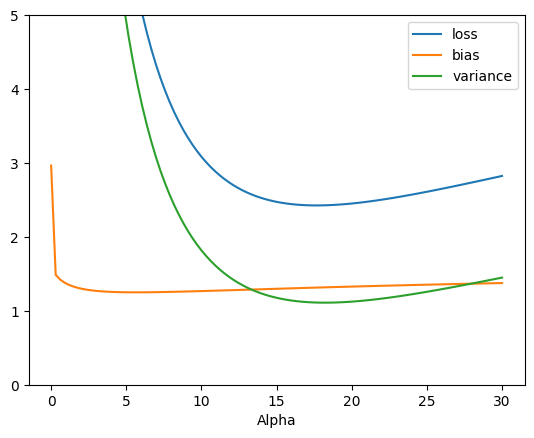

In [87]:
plt.plot(alphas,loss,label = 'loss')
plt.plot(alphas,bias,label = 'bias')
plt.plot(alphas,variance,label = 'variance')
plt.ylim(0,5)
plt.xlabel('Alpha')
plt.legend()

## Effect of Regularization on loss function

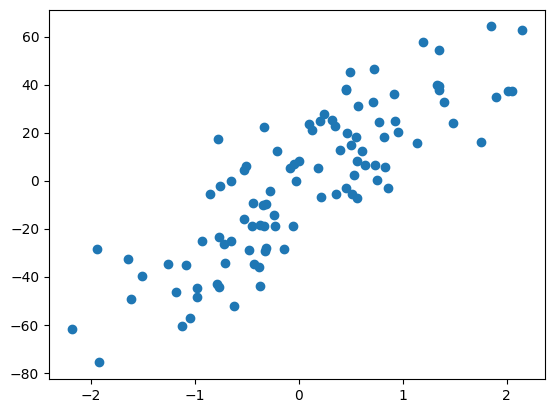

In [89]:
from sklearn.datasets import make_regression
X,y  = make_regression(n_samples = 100, n_features = 1, n_informative = 1, n_targets=1, noise = 20, random_state = 13)
plt.scatter(X,y)

In [90]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X,y)
print(reg.coef_)
print(reg.intercept_)


[27.82809103]
-2.29474455867698


In [93]:
def cal_loss(m,alpha):
  return np.sum((y - m*X.ravel()+2.29)**2) + alpha*m*m
def predict(m):
  return m*X - 2.29


So as alpha increases the slope decresese because the loss function is shifting towards zero

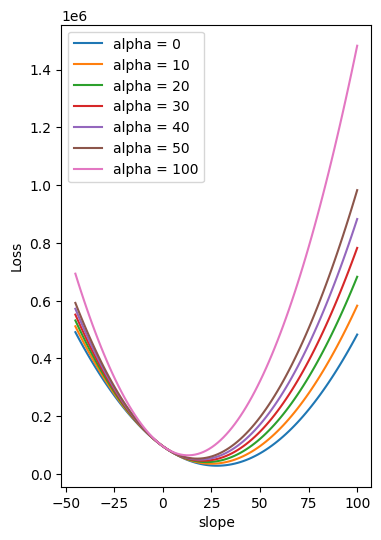

In [95]:
m = np.linspace(-45,100,100)
plt.figure(figsize = (4,6))
for j in [0,10,20,30,40,50,100]:
  loss = []
  for i in range(m.shape[0]):
    loss_i = cal_loss(m[i],j)
    loss.append(loss_i)
  plt.plot(m,loss,label = 'alpha = {}'.format(j))
plt.legend()
plt.xlabel('slope')
plt.ylabel('Loss')
plt.show()